# Networks: Friends, Epidemics & Terrorists
## Handout for Active Learning Exercise #3

The goal of this ALE is to help you understand the basic concepts of network science and get acclimated to the `Networkx` (https://networkx.org/) library in Python.

In [ ]:
# Make sure you run this code cell everytime you open the notebook!
import networkx as nx            # Import NetworkX library as nx for its network functions
import numpy as np               # Import NumPy library as np for its mathematical functions
import matplotlib.pyplot as plt  # Import Matplotlib library as plt for its plotting functions

## Centrality Measures
First, we will create a random undirected network to analyze.

In [ ]:
# Create random network of 6 nodes to analyze
n = 6         # 6 nodes
m = 10        # 10 edges
seed = 20160  # We use a seed for random number generator for reproducibility
G = nx.gnm_random_graph(n, m, seed=seed)

In [ ]:
# A function defined for simple plotting
def plot_graph(G):
  pos = nx.drawing.layout.circular_layout(G)
  plt.figure(figsize=(6,5))                                                             # Specify the figure size
  nx.draw(G, pos=pos, with_labels=True, font_weight='bold', node_size=500, \
        node_color='red', font_size=16, font_color='white',width=3, edge_color='green') # The figure properties
  plt.show()                                                                            # Show the network

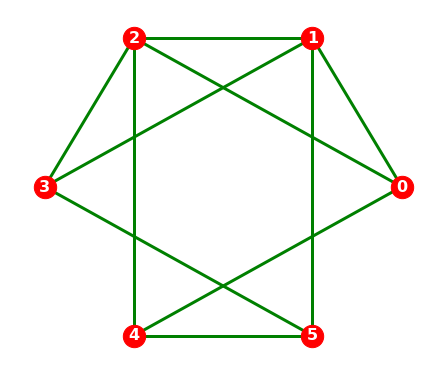

In [ ]:
# Visualize the network
plot_graph(G)

In [ ]:
# A function to print rounded values of a given dictionary:
def rounded_dict(old_dict, K=3): # This function rounds indegrees to 3 decimal places.
  round_dict = dict()
  for key in old_dict:
      # rounding to K using round()
      round_dict[key] = round(old_dict[key], K)
  return round_dict

## Degree Centrality
Compute the degree centrality for nodes.
The degree centrality for a specific node is an importance score based on the number of links held by this node. In NetworkX, the degree centrality values are normalized by dividing by the maximum possible degree in a simple graph n-1 where n is the number of nodes in G.

In [ ]:
# A function to print the highest centrality, and the corresponding nodes
def find_highest_centrality_nodes(centralities, centrality_metric):
  itemMaxValue = max(centralities.items(), key=lambda x: x[1])
  print('The maximum', centrality_metric, 'centrality score in the network : ', itemMaxValue[1])
  listOfKeys = list()
  # Iterate over all the items in dictionary to find keys with max value
  for key, value in centralities.items():
      if value == itemMaxValue[1]:
          listOfKeys.append(key)
  print('Nodes with the maximum', centrality_metric, 'centrality score: ', listOfKeys)

In [ ]:
centralities=nx.degree_centrality(G)                               # Find the degree centrality of all nodes
print("The degree centrality for all nodes: ", centralities)       # All degree centrality of the nodes in the network G.
find_highest_centrality_nodes(centralities,'degree')               # The nodes with highest degree centrality
print("The degree centrality for node 4 is ", centralities[4])     # The degree centrality of node 4

The degree centrality for all nodes:  {0: 0.6000000000000001, 1: 0.8, 2: 0.8, 3: 0.6000000000000001, 4: 0.6000000000000001, 5: 0.6000000000000001}
The maximum degree centrality score in the network :  0.8
Nodes with the maximum degree centrality score:  [1, 2]
The degree centrality for node 4 is  0.6000000000000001


## In-degree and Out-degree Centrality
For a directed network, we can look at in and out degrees. The in-degree centrality for a node v is the fraction of nodes its incoming edges are connected to.
The out-degree centrality for a node v is the fraction of nodes its outgoing edges are connected to.


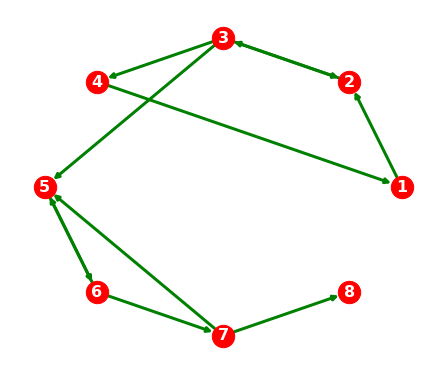

In [ ]:
# Create a sample Directed Network for Analysis
DG = nx.DiGraph()            # Create a directed cyclic graph  
nx.add_cycle(DG, [1,2,3,4])  # Add a cycle between 1, 2, 3, and 4 to the network                       
nx.add_cycle(DG, [5,6,7])    # Add a cycle between 4, 5, and 6 to the network                    
DG.add_edges_from([(7,8),(3,5),(3,2),(6,5)])

plot_graph(DG)               # Visualize the Graph

In [ ]:
print("The in-degree for each node is: ", nx.in_degree_centrality(DG)) 
print("The out-degree for each node is: ", nx.out_degree_centrality(DG))

The in-degree for each node is:  {1: 0.14285714285714285, 2: 0.2857142857142857, 3: 0.14285714285714285, 4: 0.14285714285714285, 5: 0.42857142857142855, 6: 0.14285714285714285, 7: 0.14285714285714285, 8: 0.14285714285714285}
The out-degree for each node is:  {1: 0.14285714285714285, 2: 0.14285714285714285, 3: 0.42857142857142855, 4: 0.14285714285714285, 5: 0.14285714285714285, 6: 0.2857142857142857, 7: 0.2857142857142857, 8: 0.0}


If you want to print rounded values. You can use the function we defined above.

In [ ]:
print("The in-degree for each node is: ", rounded_dict(nx.in_degree_centrality(DG),3)) 
print("The out-degree for each node is: ", rounded_dict(nx.out_degree_centrality(DG),3))

The in-degree for each node is:  {1: 0.143, 2: 0.286, 3: 0.143, 4: 0.143, 5: 0.429, 6: 0.143, 7: 0.143, 8: 0.143}
The out-degree for each node is:  {1: 0.143, 2: 0.143, 3: 0.429, 4: 0.143, 5: 0.143, 6: 0.286, 7: 0.286, 8: 0.0}


If you want to print the nodes with highest indegree/outdegree centrality scores you can use:

In [ ]:
centralities=nx.in_degree_centrality(DG)                          # Indegree centrality for all nodes
find_highest_centrality_nodes(centralities,'indegree')            # The highest indegree centrality and the corresponding nodes

centralities=nx.out_degree_centrality(DG)                         # Outdegree centrality for all nodes
find_highest_centrality_nodes(centralities,'outdegree')           # The highest outdegree centrality and the corresponding nodes

The maximum indegree centrality score in the network :  0.42857142857142855
Nodes with the maximum indegree centrality score:  [5]
The maximum outdegree centrality score in the network :  0.42857142857142855
Nodes with the maximum outdegree centrality score:  [3]


## Closeness Centrality
### For Undirected Networks
For the undirected network G constructed above, you can obtain the closeness centrality for all nodes, and the highest closeness centrality and the corresponding nodes using:

In [ ]:
centralities=nx.closeness_centrality(G)                             # Find the closeness centrality of all nodes
print("The closeness centrality for all nodes: ", centralities)     # All closeness centrality of the nodes in the network G.
find_highest_centrality_nodes(centralities,'closeness')             # The nodes with highest closeness centrality
print("The closeness centrality for node 4 is ", centralities[4])   # The closeness centrality of node 4

The closeness centrality for all nodes:  {0: 0.7142857142857143, 1: 0.8333333333333334, 2: 0.8333333333333334, 3: 0.7142857142857143, 4: 0.7142857142857143, 5: 0.7142857142857143}
The maximum closeness centrality score in the network :  0.8333333333333334
Nodes with the maximum closeness centrality score:  [1, 2]
The closeness centrality for node 4 is  0.7142857142857143


## Harmonic Centrality
Harmonic centrality of a node u is the sum of the reciprocal of the shortest path distances from all other nodes to u, where d(v, u) is the shortest-path distance between v and u. For the undirected network G constructed above, you can obtain the harmonic centrality for all nodes, and the highest harmonic centrality and the corresponding nodes using:

In [ ]:
centralities=nx.harmonic_centrality(G)                               # Find the harmonic centrality of all nodes
print("The harmonic centrality for all nodes: ", centralities)       # All harmonic centrality of the nodes in the network G.
find_highest_centrality_nodes(centralities,'harmonic')               # The nodes with highest harmonic centrality
print("The harmonic centrality for node 4 is ", centralities[4])     # The harmonic centrality of node 4

The harmonic centrality for all nodes:  {0: 4.0, 1: 4.5, 2: 4.5, 3: 4.0, 4: 4.0, 5: 4.0}
The maximum harmonic centrality score in the network :  4.5
Nodes with the maximum harmonic centrality score:  [1, 2]
The harmonic centrality for node 4 is  4.0


### Betweeness Centrality
For the undirected network G constructed above, you can obtain the betweenness centrality for all nodes, and the highest betweenness centrality and the corresponding nodes using:

In [ ]:
centralities=nx.betweenness_centrality(G)                            # Find betweenness centrality of all nodes
print("The betweenness centrality for all nodes: ", centralities)    # All betweenness centrality of the nodes in the network G.
find_highest_centrality_nodes(centralities,'betweenness')            # The nodes with highest betweenness centrality
print("The betweenness centrality for node 4 is ", centralities[4])  # The betweenness centrality of node 4

The betweenness centrality for all nodes:  {0: 0.03333333333333333, 1: 0.13333333333333333, 2: 0.13333333333333333, 3: 0.03333333333333333, 4: 0.08333333333333333, 5: 0.08333333333333333}
The maximum betweenness centrality score in the network :  0.13333333333333333
Nodes with the maximum betweenness centrality score:  [1, 2]
The betweenness centrality for node 4 is  0.08333333333333333


To compute betweenness centrality for edges, we use:

In [ ]:
centralities=nx.edge_betweenness_centrality(G)                              # Edge betweenness centrality for all nodes
print("The betweenness centrality for all edges: ", centralities)
find_highest_centrality_nodes(centralities, 'betweenness')                  # The highest edge betweenness centrality and the corresponding edges
# Please note that we are using the function we wrote for node centralities here rather than writing a new function for edges.

The betweenness centrality for all edges:  {(0, 4): 0.12222222222222222, (0, 1): 0.15555555555555553, (0, 2): 0.1, (1, 2): 0.11111111111111112, (1, 3): 0.1, (1, 5): 0.14444444444444443, (2, 3): 0.15555555555555553, (2, 4): 0.14444444444444443, (3, 5): 0.1222222222222222, (4, 5): 0.17777777777777776}
The maximum betweenness centrality score in the network :  0.17777777777777776
Nodes with the maximum betweenness centrality score:  [(4, 5)]


## Eigenvector Centrality
Eigenvector centrality computes the centrality for a node based on the centrality of its neighbors. For the undirected network G constructed above, you can obtain the eigenvector centrality for all nodes, and the highest eigenvector centrality and the corresponding nodes using:

In [ ]:
centralities=nx.eigenvector_centrality(G)                            # Find eigenvector centrality of all nodes
print("The eigenvector centrality for all nodes: ", centralities)    # All eigenvector centrality of the nodes in the network G.
find_highest_centrality_nodes(centralities,'eigenvector')            # The nodes with highest eigenvector centrality
print("The eigenvector centrality for node 4 is ", centralities[4])  # The eigenvector centrality of node 4

The eigenvector centrality for all nodes:  {0: 0.38474685021331617, 1: 0.4724185863720421, 2: 0.4724185863720421, 3: 0.38474685021331617, 4: 0.3588739897250476, 5: 0.3588739897250476}
The maximum eigenvector centrality score in the network :  0.4724185863720421
Nodes with the maximum eigenvector centrality score:  [1, 2]
The eigenvector centrality for node 4 is  0.3588739897250476


## Page Rank

PageRank computes a ranking of the nodes in the graph G based on the structure of the incoming links. It was originally designed as an algorithm to rank web pages. For the undirected network G constructed above, you can obtain the pagerank centrality for all nodes, and the highest pagerank centrality and the corresponding nodes using:

In [ ]:
centralities=nx.pagerank(G)                                          # Find the pagerank centrality of all nodes
print("The pagerank centrality for all nodes: ", centralities)       # All pagerank centrality of the nodes in the network G.
find_highest_centrality_nodes(centralities,'pagerank')               # The nodes with highest pagerank centrality
print("The pagerank centrality for node 4 is ", centralities[4])     # The pagerank centrality of node 4

The pagerank centrality for all nodes:  {0: 0.1514760978904801, 1: 0.19572087737220378, 2: 0.19572087737220378, 3: 0.1514760978904801, 4: 0.15280302473731586, 5: 0.15280302473731586}
The maximum pagerank centrality score in the network :  0.19572087737220378
Nodes with the maximum pagerank centrality score:  [1, 2]
The pagerank centrality for node 4 is  0.15280302473731586


## Group of Nodes
### Clique
Lets first create a random network.


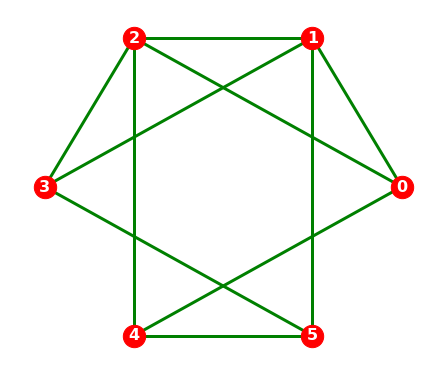

In [ ]:
# Create random network of 6 nodes to analyze
n = 6          # 6 nodes
m = 10         # 10 edges
seed = 20160   # We use a seed for random number generator for reproducibility
G = nx.gnm_random_graph(n, m, seed=seed)
plot_graph(G)


To find a clique within a (directed or undirected network), the `find_cliques` function will return all maximal cliques in an undirected network. For each node n, a maximal clique for n is a largest complete subgraph containing n. The largest maximal clique is sometimes called the maximum clique.

In [ ]:
cliques = list(nx.find_cliques(G))
print("All clique(s) in G: ", cliques)                                                                      # All cluques of network G
# You can also eliminate the trivial cliques (i.e., node pairs)  
print("Non-trivial clique(s) in G: ", sorted(comps for comps in cliques if len(comps) > 2))                 # The cliques with more than two nodes for G
clique_lengths = [len(i) for i in cliques]
print("Largest clique(s) in G: ", sorted(comps for comps in cliques if len(comps) == max(clique_lengths) )) # The largest clique(s) of network G

All clique(s) in G:  [[1, 2, 0], [1, 2, 3], [1, 5, 3], [4, 0, 2], [4, 5]]
Non-trivial clique(s) in G:  [[1, 2, 0], [1, 2, 3], [1, 5, 3], [4, 0, 2]]
Largest clique(s) in G:  [[1, 2, 0], [1, 2, 3], [1, 5, 3], [4, 0, 2]]


### Cores
A k-core is a maximal subgraph that contains nodes of degree k or more. To obtain the k-core of G, we use:

[1, 2, 3, 4, 5, 6, 7]


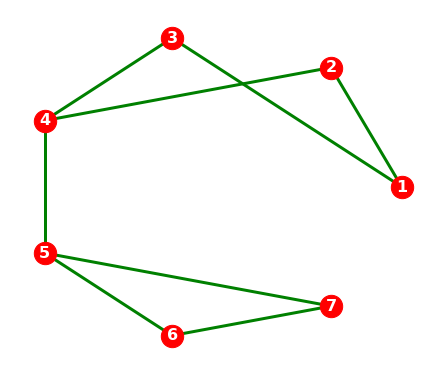

In [ ]:
G=nx.Graph()
G.add_edges_from([(1,2),(1,3),(2,4),(3,4),(4,5),(5,6),(5,7),(6,7)])             # A sample network
cores = list(nx.k_core(G, k=2))                                                 # List 2 cores. To get X cores change 2 to X.
print(cores)
H = G.subgraph(cores)
plot_graph(H)

## Components and k-components
A k-component is a maximal subgraph of a graph G that has, at least, node connectivity k: we need to remove at least k nodes to break it into more components. k-components have an inherent hierarchical structure because they are nested in terms of connectivity: a connected graph can contain several 2-components, each of which can contain one or more 3-components, and so forth.

In [ ]:
nx.k_components(G)                 # List all k-components (k<number of nodes)

{2: [{5, 6, 7}, {1, 2, 3, 4}], 1: [{1, 2, 3, 4, 5, 6, 7}]}

You can check for a specific value of k by providing the input:

In [ ]:
nx.k_components(G)[2]               # 2-components of network G

[{5, 6, 7}, {1, 2, 3, 4}]

## Reciprocity

The reciprocity of a directed network is defined as the ratio of the number of edges pointing in both directions to the total number of edges in the network. To compute the reciprocity in a directed network:

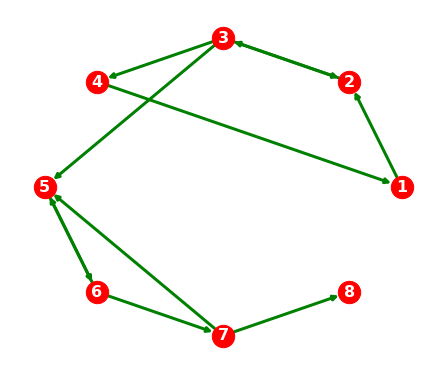

The reciprocity of network DG: 0.36363636363636365


In [ ]:
# Create a sample Directed Network for Analysis
DG = nx.DiGraph()            # Create a directed network  
nx.add_cycle(DG, [1,2,3,4])  # Add a cycle between 1, 2, 3, and 4 to the network                       
nx.add_cycle(DG, [5,6,7])    # Add a cycle between 4, 5, and 6 to the network                    
DG.add_edges_from([(7,8),(3,5),(3,2),(6,5)])

plot_graph(DG)               # Visualize the network

print('The reciprocity of network DG:', nx.reciprocity(DG))   # Calculate the reciprocity of the network

## Structural Balance of a Network

[[2, 3, 1], [2, 4, 3]]


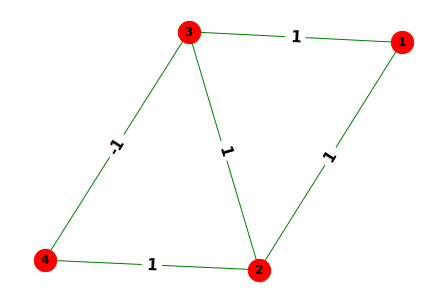

In [ ]:
G = nx.Graph()                                                            # Create a sample network
G.add_edges_from([(1,2),(2,3),(1,3),(2,4)], relationship=1)               # 1 and 2 are friendly, 1 and 3 are friendly, etc.
G.add_edges_from([(3,4)], relationship=-1)                                # 3 and 4 are hostile
labels = {e[0:2]:e[2]['relationship'] for e in G.edges(data=True)} 
layout = nx.spring_layout(G)
nx.draw(G,pos=layout, with_labels=True, node_size=500,node_color='red',font_weight='bold',edge_color='green')
nx.draw_networkx_edge_labels(G,pos=layout, edge_labels=labels,font_size=15,font_weight='bold')
print(nx.cycle_basis(G))

In [ ]:
triangles = [c for c in nx.cycle_basis(G) if len(c)==3]
triangle_types={}
for triangle in triangles:
    tri=nx.subgraph(G,triangle)
    #Take the product of the edge relationships. If there are an odd number of -1s, the triangle is unbalanced
    triangle_types[tuple(tri.nodes())]=np.product([x[2]['relationship'] for x in tri.edges(data=True)])
print(triangle_types)                      # 1 indicates structural balance, -1 indicates structural imbalance

{(1, 2, 3): 1, (2, 3, 4): -1}


## Network Analysis
We will analyze different types of network using the concepts introduced above. We will combine the code above to perform all the network creation and analysis together. We will provide code for three network types: Undirected, Directed and Weighted.

### Undirected Network

We will first create an undirected network, and then perform analysis on that network.

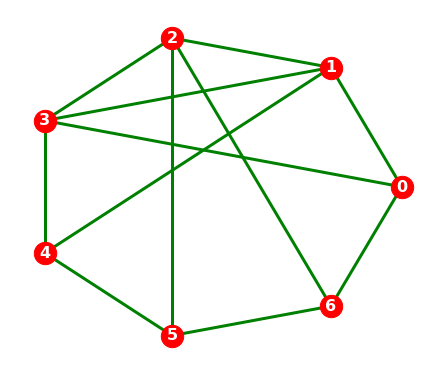

In [ ]:
n = 7      # 6 nodes
m = 12     # 10 edges
seed = 20  # seed random number generators for reproducibility
# Use seed for reproducibility
G = nx.gnm_random_graph(n, m, seed=seed)
plot_graph(G)


### Analysis of an undirected network

In [ ]:
def find_highest_centrality_nodes(centralities, centrality_metric): # Function for finding the highest centrality scores
  itemMaxValue = max(centralities.items(), key=lambda x: x[1])
  print('The maximum', centrality_metric, 'centrality score in the network : ', itemMaxValue[1])
  listOfKeys = list()
  # Iterate over all the items in dictionary to find keys with max value
  for key, value in centralities.items():
      if value == itemMaxValue[1]:
          listOfKeys.append(key)
  print('Nodes with the maximum', centrality_metric, 'centrality score: ', listOfKeys)
  
centralities=nx.degree_centrality(G)                               # Find the degree centrality of all nodes
print("The degree centrality for all nodes: ", centralities)       # All degree centrality of the nodes in the network G.
find_highest_centrality_nodes(centralities,'degree')               # The nodes with highest degree centrality
print("The degree centrality for node 4 is ", centralities[4])     # The degree centrality of node 4

centralities=nx.closeness_centrality(G)                             # Find the closeness centrality of all nodes
print("The closeness centrality for all nodes: ", centralities)     # All closeness centrality of the nodes in the network G.
find_highest_centrality_nodes(centralities,'closeness')             # The nodes with highest closeness centrality
print("The closeness centrality for node 4 is ", centralities[4])   # The closeness centrality of node 4

centralities=nx.harmonic_centrality(G)                               # Find the harmonic centrality of all nodes
print("The harmonic centrality for all nodes: ", centralities)       # All harmonic centrality of the nodes in the network G.
find_highest_centrality_nodes(centralities,'harmonic')               # The nodes with highest harmonic centrality
print("The harmonic centrality for node 4 is ", centralities[4])     # The harmonic centrality of node 4

centralities=nx.betweenness_centrality(G)                            # Find betweenness centrality of all nodes
print("The betweenness centrality for all nodes: ", centralities)    # All betweenness centrality of the nodes in the network G.
find_highest_centrality_nodes(centralities,'betweenness')            # The nodes with highest betweenness centrality
print("The betweenness centrality for node 4 is ", centralities[4])  # The betweenness centrality of node 4

centralities=nx.eigenvector_centrality(G)                            # Find eigenvector centrality of all nodes
print("The eigenvector centrality for all nodes: ", centralities)    # All eigenvector centrality of the nodes in the network G.
find_highest_centrality_nodes(centralities,'eigenvector')            # The nodes with highest eigenvector centrality
print("The eigenvector centrality for node 4 is ", centralities[4])  # The eigenvector centrality of node 4

centralities=nx.pagerank(G)                                          # Find the pagerank centrality of all nodes
print("The pagerank centrality for all nodes: ", centralities)       # All pagerank centrality of the nodes in the network G.
find_highest_centrality_nodes(centralities,'pagerank')               # The nodes with highest pagerank centrality
print("The pagerank centrality for node 4 is ", centralities[4])     # The pagerank centrality of node 4

print("Cliques found in network ", list(nx.find_cliques(G)))         # The cliques in network G.
print("3-cores found in network ",list(nx.k_core(G, k=3)))           # 3-cores in network G. It may give an error if there is none.
print("2-components found in network ",nx.k_components(G)[2])        # 2-components in network G. It may give an error if there is none.

The degree centrality for all nodes:  {0: 0.5, 1: 0.6666666666666666, 2: 0.6666666666666666, 3: 0.6666666666666666, 4: 0.5, 5: 0.5, 6: 0.5}
The maximum degree centrality score in the network :  0.6666666666666666
Nodes with the maximum degree centrality score:  [1, 2, 3]
The degree centrality for node 4 is  0.5
The closeness centrality for all nodes:  {0: 0.6666666666666666, 1: 0.75, 2: 0.75, 3: 0.75, 4: 0.6666666666666666, 5: 0.6666666666666666, 6: 0.6666666666666666}
The maximum closeness centrality score in the network :  0.75
Nodes with the maximum closeness centrality score:  [1, 2, 3]
The closeness centrality for node 4 is  0.6666666666666666
The harmonic centrality for all nodes:  {0: 4.5, 1: 5.0, 2: 5.0, 3: 5.0, 4: 4.5, 5: 4.5, 6: 4.5}
The maximum harmonic centrality score in the network :  5.0
Nodes with the maximum harmonic centrality score:  [1, 2, 3]
The harmonic centrality for node 4 is  4.5
The betweenness centrality for all nodes:  {0: 0.06666666666666667, 1: 0.077777777

## Directed Networks

We will first create a directed network, and then perform analysis on that network.

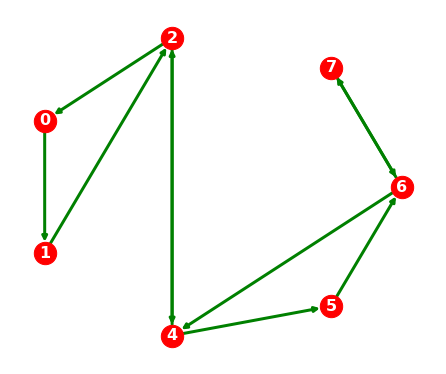

In [ ]:
# Create a Directed cyclic graph
DG = nx.DiGraph()
DG.add_edges_from([(6,7),(2,0),(0,1),(1,2),(2,4),(6,4),(4,5),(5,6),(4,2),(7,6)])

# Visualize the Graph
plot_graph(DG)

### Analysis of a directed network

In [ ]:
def find_highest_centrality_nodes(centralities, centrality_metric): # Function for finding the highest centrality scores
  itemMaxValue = max(centralities.items(), key=lambda x: x[1])
  print('The maximum', centrality_metric, 'centrality score in the network : ', itemMaxValue[1])
  listOfKeys = list()
  # Iterate over all the items in dictionary to find keys with max value
  for key, value in centralities.items():
      if value == itemMaxValue[1]:
          listOfKeys.append(key)
  print('Nodes with the maximum', centrality_metric, 'centrality score: ', listOfKeys)

centralities=nx.degree_centrality(DG)                              # Find the degree centrality of all nodes
print("The degree centrality for all nodes: ", centralities)       # All degree centrality of the nodes in the network DG.
find_highest_centrality_nodes(centralities,'degree')               # The nodes with highest degree centrality
print("The degree centrality for node 4 is ", centralities[4])     # The degree centrality of node 4

centralities=nx.in_degree_centrality(DG)                            # Find the indegree centrality of all nodes
print("The indegree centrality for all nodes: ", centralities)      # All indegree centrality of the nodes in the network DG.
find_highest_centrality_nodes(centralities,'indegree')              # The nodes with highest indegree centrality
print("The indegree centrality for node 4 is ", centralities[4])    # The indegree centrality of node 4

centralities=nx.out_degree_centrality(DG)                           # Find the outdegree centrality of all nodes
print("The outdegree centrality for all nodes: ", centralities)     # All outdegree centrality of the nodes in the network DG.
find_highest_centrality_nodes(centralities,'outdegree')             # The nodes with highest outdegree centrality
print("The outdegree centrality for node 4 is ", centralities[4])   # The outdegree centrality of node 4

centralities=nx.closeness_centrality(DG)                            # Find the closeness centrality of all nodes
print("The closeness centrality for all nodes: ", centralities)     # All closeness centrality of the nodes in the network DG.
find_highest_centrality_nodes(centralities,'closeness')             # The nodes with highest closeness centrality
print("The closeness centrality for node 4 is ", centralities[4])   # The closeness centrality of node 4

centralities=nx.harmonic_centrality(DG)                              # Find the harmonic centrality of all nodes
print("The harmonic centrality for all nodes: ", centralities)       # All harmonic centrality of the nodes in the network DG.
find_highest_centrality_nodes(centralities,'harmonic')               # The nodes with highest harmonic centrality
print("The harmonic centrality for node 4 is ", centralities[4])     # The harmonic centrality of node 4

centralities=nx.betweenness_centrality(DG)                           # Find betweenness centrality of all nodes
print("The betweenness centrality for all nodes: ", centralities)    # All betweenness centrality of the nodes in the network DG.
find_highest_centrality_nodes(centralities,'betweenness')            # The nodes with highest betweenness centrality
print("The betweenness centrality for node 4 is ", centralities[4])  # The betweenness centrality of node 4

centralities=nx.eigenvector_centrality(DG)                           # Find eigenvector centrality of all nodes
print("The eigenvector centrality for all nodes: ", centralities)    # All eigenvector centrality of the nodes in the network DG.
find_highest_centrality_nodes(centralities,'eigenvector')            # The nodes with highest eigenvector centrality
print("The eigenvector centrality for node 4 is ", centralities[4])  # The eigenvector centrality of node 4

centralities=nx.pagerank(DG)                                         # Find the pagerank centrality of all nodes
print("The pagerank centrality for all nodes: ", centralities)       # All pagerank centrality of the nodes in the network DG.
find_highest_centrality_nodes(centralities,'pagerank')               # The nodes with highest pagerank centrality
print("The pagerank centrality for node 4 is ", centralities[4])     # The pagerank centrality of node 4

print("Reciprocity of the network ",nx.reciprocity(DG))              # Reciprocity
print("2-cores found in network ",list(nx.k_core(DG, k=2)))          # 2-cores. It may give an error if there is none. 

Sorted Centrality Scores: {6: 0.6666666666666666, 2: 0.6666666666666666, 4: 0.6666666666666666, 7: 0.3333333333333333, 0: 0.3333333333333333, 1: 0.3333333333333333, 5: 0.3333333333333333}
The degree centrality for all nodes:  {6: 0.6666666666666666, 7: 0.3333333333333333, 2: 0.6666666666666666, 0: 0.3333333333333333, 1: 0.3333333333333333, 4: 0.6666666666666666, 5: 0.3333333333333333}
The maximum degree centrality score in the network :  0.6666666666666666
Nodes with the maximum degree centrality score:  [6, 2, 4]
The degree centrality for node 4 is  0.6666666666666666
The indegree centrality for all nodes:  {6: 0.3333333333333333, 7: 0.16666666666666666, 2: 0.3333333333333333, 0: 0.16666666666666666, 1: 0.16666666666666666, 4: 0.3333333333333333, 5: 0.16666666666666666}
The maximum indegree centrality score in the network :  0.3333333333333333
Nodes with the maximum indegree centrality score:  [6, 2, 4]
The indegree centrality for node 4 is  0.3333333333333333
The outdegree centrality


### Weighted Network (Undirected Version)
Recall that in weighted networks links can have different values attached to them. In a weighted network case, you can also record how long did a phone conversation take using network weights. Please note that we can create a weighted network for both undirected and directed networks. We will first create a weighted network, and then perform network analysis.

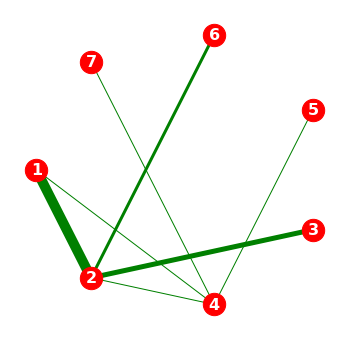

In [ ]:
WG = nx.Graph()                                 # Construct an undirected graph
WG.add_weighted_edges_from([(1, 2, 10), (1,4,1), (2,3,5), (2,4,1),(4,5,1),(2,6,3),(4,7,1)])  # Add the links. Weight=3rd number 
widths = nx.get_edge_attributes(WG, 'weight')   # Set the width of links as the weights
nodelist = WG.nodes()                           # List of nodes
plt.figure(figsize=(6,6))                       # Set the figue size   
pos = nx.shell_layout(WG)                       # Set the position os the nodes

# Plot the nodes
nx.draw_networkx_nodes(WG,pos, nodelist=nodelist, node_size=500, node_color='red', alpha=1)

# Plot the edges
nx.draw_networkx_edges(WG,pos, edgelist = widths.keys(), width=list(widths.values()), edge_color='green', alpha=1)

# Plot the labels
nx.draw_networkx_labels(WG, pos=pos, font_size=16, font_weight='bold', labels=dict(zip(nodelist,nodelist)),
                        font_color='white')
plt.box(False)
plt.show()

### Analysis of a weighted network

In [ ]:
def find_highest_centrality_nodes(centralities, centrality_metric): # Function for finding the highest centrality scores
  itemMaxValue = max(centralities.items(), key=lambda x: x[1])
  print('The maximum', centrality_metric, 'centrality score in the network : ', itemMaxValue[1])
  listOfKeys = list()
  # Iterate over all the items in dictionary to find keys with max value
  for key, value in centralities.items():
      if value == itemMaxValue[1]:
          listOfKeys.append(key)
  print('Nodes with the maximum', centrality_metric, 'centrality score: ', listOfKeys)

my_dict= dict(WG.degree(weight='weight'))                            # Finding the degree centrality for a weighted network here
total = sum(my_dict.values())
centralities = {key: value / total for key, value in my_dict.items()}
print("The degree centrality for all nodes: ", centralities)         # All degree centrality of the nodes in the network WG.
find_highest_centrality_nodes(centralities,'degree')                 # The nodes with highest degree centrality
print("The degree centrality for node 4 is ", centralities[4])       # The degree centrality of node 4

centralities=nx.closeness_centrality(WG, distance='weight')          # Find the closeness centrality of all nodes
print("The closeness centrality for all nodes: ", centralities)      # All closeness centrality of the nodes in the network WG.
find_highest_centrality_nodes(centralities,'closeness')              # The nodes with highest closeness centrality
print("The closeness centrality for node 4 is ", centralities[4])    # The closeness centrality of node 4

centralities=nx.harmonic_centrality(WG, distance='weight')           # Find the harmonic centrality of all nodes
print("The harmonic centrality for all nodes: ", centralities)       # All harmonic centrality of the nodes in the network WG.
find_highest_centrality_nodes(centralities,'harmonic')               # The nodes with highest harmonic centrality
print("The harmonic centrality for node 4 is ", centralities[4])     # The harmonic centrality of node 4

centralities=nx.betweenness_centrality(WG, weight='weight')          # Find betweenness centrality of all nodes
print("The betweenness centrality for all nodes: ", centralities)    # All betweenness centrality of the nodes in the network WG.
find_highest_centrality_nodes(centralities,'betweenness')            # The nodes with highest betweenness centrality
print("The betweenness centrality for node 4 is ", centralities[4])  # The betweenness centrality of node 4

centralities=nx.eigenvector_centrality(WG, weight='weight')          # Find eigenvector centrality of all nodes
print("The eigenvector centrality for all nodes: ", centralities)    # All eigenvector centrality of the nodes in the network WG.
find_highest_centrality_nodes(centralities,'eigenvector')            # The nodes with highest eigenvector centrality
print("The eigenvector centrality for node 4 is ", centralities[4])  # The eigenvector centrality of node 4

centralities=nx.pagerank(WG, weight='weight',max_iter=100000)        # Find the pagerank centrality of all nodes
print("The pagerank centrality for all nodes: ", centralities)       # All pagerank centrality of the nodes in the network WG.
find_highest_centrality_nodes(centralities,'pagerank')               # The nodes with highest pagerank centrality
print("The pagerank centrality for node 4 is ", centralities[4])     # The pagerank centrality of node 4

print("Cliques found in network ", list(nx.find_cliques(WG)))         # The cliques in network WG.
print("3-cores found in network ",list(nx.k_core(WG, k=2)))           # 2-cores in network WG. It may give an error if there is none.
print("2-components found in network ",nx.k_components(WG)[2])        # 2-components in network WG. It may give an error if there is none.

The degree centrality for all nodes:  {1: 0.25, 2: 0.4318181818181818, 4: 0.09090909090909091, 3: 0.11363636363636363, 5: 0.022727272727272728, 6: 0.06818181818181818, 7: 0.022727272727272728}
The maximum degree centrality score in the network :  0.4318181818181818
Nodes with the maximum degree centrality score:  [2]
The degree centrality for node 4 is  0.09090909090909091
The closeness centrality for all nodes:  {1: 0.3157894736842105, 2: 0.4, 4: 0.42857142857142855, 3: 0.15, 5: 0.3157894736842105, 6: 0.2, 7: 0.3157894736842105}
The maximum closeness centrality score in the network :  0.42857142857142855
Nodes with the maximum closeness centrality score:  [4]
The closeness centrality for node 4 is  0.42857142857142855
The harmonic centrality for all nodes:  {1: 2.842857142857143, 2: 3.0333333333333337, 3: 0.9202380952380951, 4: 4.416666666666666, 5: 2.842857142857143, 6: 1.3083333333333333, 7: 2.842857142857143}
The maximum harmonic centrality score in the network :  4.416666666666666